In [42]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline

In [43]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [45]:
# Augment by 5%, 10%, and 20%
augmented_random_5 = augment_data(original_train_data, 0.05, MODE.RANDOM)
augmented_random_10 = augment_data(original_train_data,  0.10, MODE.RANDOM)
augmented_random_20 = augment_data(original_train_data,  0.20, MODE.RANDOM)

# Convert augmented data into Datasets
augmented_random_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_5],
    "label": [item["label"] for item in augmented_random_5]
}, features=features)

augmented_random_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_10],
    "label": [item["label"] for item in augmented_random_10]
}, features=features)

augmented_random_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_20],
    "label": [item["label"] for item in augmented_random_20]
}, features=features)

# Concatenate original and augmented datasets
augmented_random_train_data_5 = concatenate_datasets([original_train_data, augmented_random_5_dataset])
augmented_random_train_data_10 = concatenate_datasets([original_train_data, augmented_random_10_dataset])
augmented_random_train_data_20 = concatenate_datasets([original_train_data, augmented_random_20_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_random_train_data_5)}")
print(f"Train size after 10% augmentation: {len(augmented_random_train_data_10)}")
print(f"Train size after 20% augmentation: {len(augmented_random_train_data_20)}")

Original train size: 8530
Train size after 5% augmentation: 8956
Train size after 10% augmentation: 9382
Train size after 20% augmentation: 10235


In [46]:
pipeline_random_5= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_10 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_20 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [47]:
pipeline_random_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.29it/s]


Epoch: 1/10
Train Loss: 0.654, Train Acc: 0.592
Valid Loss: 0.600, Valid Acc: 0.671


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.14it/s]


Epoch: 2/10
Train Loss: 0.573, Train Acc: 0.704
Valid Loss: 0.587, Valid Acc: 0.688


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.47it/s]


Epoch: 3/10
Train Loss: 0.517, Train Acc: 0.748
Valid Loss: 0.520, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.21it/s]


Epoch: 4/10
Train Loss: 0.459, Train Acc: 0.786
Valid Loss: 0.505, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.62it/s]


Epoch: 5/10
Train Loss: 0.412, Train Acc: 0.815
Valid Loss: 0.529, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.45it/s]


Epoch: 6/10
Train Loss: 0.371, Train Acc: 0.837
Valid Loss: 0.616, Valid Acc: 0.706


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.73it/s]


Epoch: 7/10
Train Loss: 0.328, Train Acc: 0.861
Valid Loss: 0.638, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]


Epoch: 8/10
Train Loss: 0.265, Train Acc: 0.897
Valid Loss: 0.683, Valid Acc: 0.726


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]


Epoch: 9/10
Train Loss: 0.227, Train Acc: 0.914
Valid Loss: 0.749, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.69it/s]

Epoch: 10/10
Train Loss: 0.173, Train Acc: 0.939
Valid Loss: 0.899, Valid Acc: 0.730


In [48]:
pipeline_random_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.46it/s]


Epoch: 1/10
Train Loss: 0.656, Train Acc: 0.590
Valid Loss: 0.589, Valid Acc: 0.701


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]


Epoch: 2/10
Train Loss: 0.531, Train Acc: 0.737
Valid Loss: 0.546, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Epoch: 3/10
Train Loss: 0.479, Train Acc: 0.774
Valid Loss: 0.529, Valid Acc: 0.728


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 12.22it/s]


Epoch: 4/10
Train Loss: 0.431, Train Acc: 0.804
Valid Loss: 0.578, Valid Acc: 0.716


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.87it/s]


Epoch: 5/10
Train Loss: 0.382, Train Acc: 0.835
Valid Loss: 0.578, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.43it/s]


Epoch: 6/10
Train Loss: 0.328, Train Acc: 0.865
Valid Loss: 0.617, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.02it/s]


Epoch: 7/10
Train Loss: 0.282, Train Acc: 0.888
Valid Loss: 0.661, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]


Epoch: 8/10
Train Loss: 0.240, Train Acc: 0.909
Valid Loss: 0.693, Valid Acc: 0.718


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.33it/s]


Epoch: 9/10
Train Loss: 0.198, Train Acc: 0.929
Valid Loss: 0.841, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 11.50it/s]

Epoch: 10/10
Train Loss: 0.164, Train Acc: 0.943
Valid Loss: 0.871, Valid Acc: 0.739


In [49]:
pipeline_random_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.03it/s]


Epoch: 1/10
Train Loss: 0.652, Train Acc: 0.603
Valid Loss: 0.626, Valid Acc: 0.628


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.98it/s]


Epoch: 2/10
Train Loss: 0.543, Train Acc: 0.726
Valid Loss: 0.509, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.27it/s]


Epoch: 3/10
Train Loss: 0.486, Train Acc: 0.774
Valid Loss: 0.512, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.15it/s]


Epoch: 4/10
Train Loss: 0.438, Train Acc: 0.805
Valid Loss: 0.509, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]


Epoch: 5/10
Train Loss: 0.379, Train Acc: 0.840
Valid Loss: 0.522, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.58it/s]


Epoch: 6/10
Train Loss: 0.330, Train Acc: 0.866
Valid Loss: 0.525, Valid Acc: 0.776


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.71it/s]


Epoch: 7/10
Train Loss: 0.289, Train Acc: 0.886
Valid Loss: 0.597, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.90it/s]


Epoch: 8/10
Train Loss: 0.234, Train Acc: 0.913
Valid Loss: 0.644, Valid Acc: 0.780


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.32it/s]


Epoch: 9/10
Train Loss: 0.176, Train Acc: 0.938
Valid Loss: 0.692, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:00<00:00, 10.26it/s]

Epoch: 10/10
Train Loss: 0.137, Train Acc: 0.954
Valid Loss: 0.784, Valid Acc: 0.757


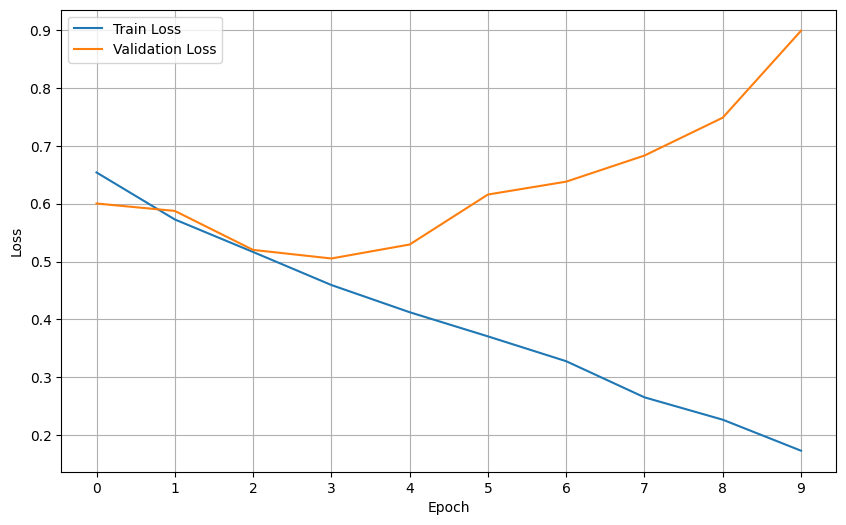

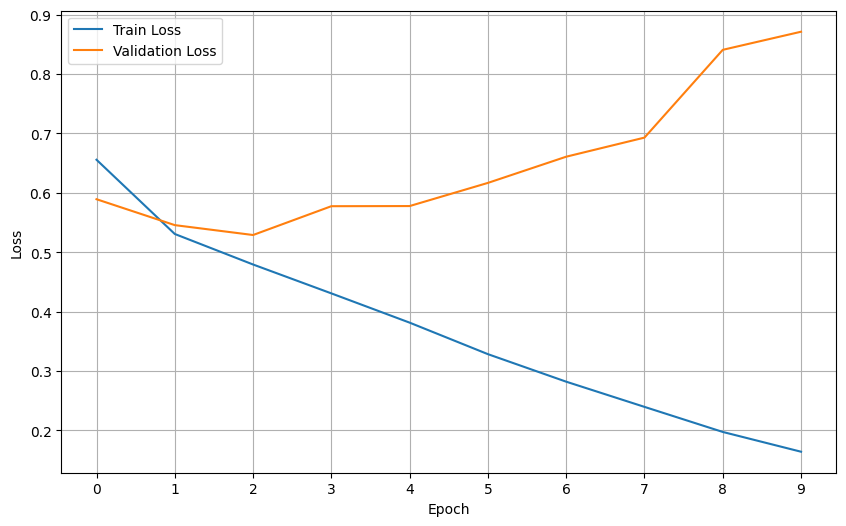

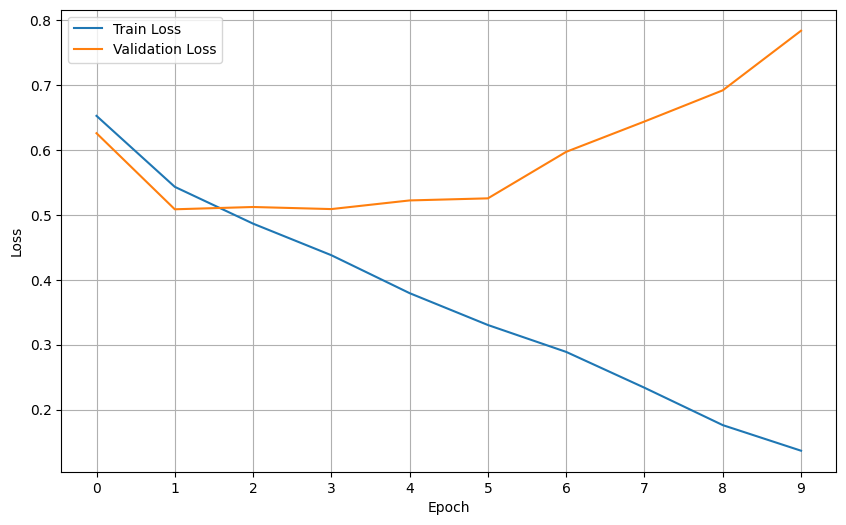

In [51]:
# Plot the loss graph
pipeline_random_5.plot_loss()
pipeline_random_10.plot_loss()
pipeline_random_20.plot_loss()